# "map_1" - "map_5" ---- cliff
# "map_6" - "map_10" ---- marsh
# "map_11" - "map_15" ---- complexe

## Tips : The green blocks represent the walls, the red ones represent the cliffs, and the blue ones represent the marshes; white ones mean the road that we can pass, grey one means the stratpoint where the games begin, and yellow ones mean the endpoint we should reach.

In [5]:
import json
import random
import pygame
import matplotlib.pyplot as plt
import numpy as np
import pickle
from IPython.display import Image

with open('datas.json', 'r') as file:
    datas=json.load(file)


In [6]:
class QLearningAgent:
    def __init__(self, grid_world, alpha=0.1, gamma=0.95, epsilon=0.1):
        self.grid_world = grid_world
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}
        self.actions = ["up", "down", "left", "right"]

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0)

    def update_q_value(self, state, action, new_value):
        self.q_table[(state, action)] = new_value

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)
        else:
            q_values = [self.get_q_value(state, action) for action in self.actions]
            max_q_value = max(q_values)
            max_q_indices = [i for i in range(len(q_values)) if q_values[i] == max_q_value]
            return self.actions[random.choice(max_q_indices)]

    def learn(self, state, action, reward, next_state):
        current_q_value = self.get_q_value(state, action)
        next_q_values = [self.get_q_value(next_state, a) for a in self.actions] 
        max_next_q_value = max(next_q_values)
        new_q_value = current_q_value + self.alpha * (reward + self.gamma * max_next_q_value - current_q_value)
        self.update_q_value(state, action, new_q_value)
        
# Create a SARSA agent class
class SarsaAgent:
    def __init__(self, grid_world, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.grid_world = grid_world
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}
        self.actions = ["up", "down", "left", "right"]

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0)

    def update_q_value(self, state, action, new_value):
        self.q_table[(state, action)] = new_value

    def choose_action(self, state):
        if random.random() < self.epsilon:
            return random.choice(self.actions)
        else:
            q_values = [self.get_q_value(state, a) for a in self.actions]
            max_q_value = max(q_values)
            max_actions = [a for a, q in zip(self.actions, q_values) if q == max_q_value]
            return random.choice(max_actions)

    def learn(self, state, action, reward, next_state, next_action):
        current_q_value = self.get_q_value(state, action)
        next_q_value = self.get_q_value(next_state, next_action)
        new_q_value = current_q_value + self.alpha * (reward + self.gamma * next_q_value - current_q_value)
        self.update_q_value(state, action, new_q_value)
     

qlearning
[[8160 8078 8078 8160 8004    0    0    2   63   60]
 [8328    0    0    0 6005    0    0   -4    0  138]
 [8244    0    0    0 8762    0    0   -3    0  485]
 [8413    0    0    0 8674    0    0   -5    0 1944]
 [8586 8499 8762 8762 8762    0 5588   -3    0 3659]
 [   0    0    0    0 9034    0 8686    0 1694 1619]
 [   0    0    0    0 9126 8942 8852    0 1630 7884]
 [   0    0    0    0 9219    0    0    0    0 9699]
 [   0    0    0    0 8160    0    0 8160 9700 9799]
 [   0    0    0    0 9313 9408 9408 9504    0    0]]
sarsa
[[7125 4377 3044 4196 2676    0    0 8873 9126 9219]
 [7522    0    0    0 3065    0    0 8689    0 9169]
 [7599    0    0    0 4018    0    0 8694    0 9152]
 [7367    0    0    0 4794    0    0 8762    0 9375]
 [7484 7539 7657 7995 7333    0 8317 8371    0 9466]
 [   0    0    0    0 7811    0 8284    0 9561 9581]
 [   0    0    0    0 7122 8111 8113    0 9694 9799]
 [   0    0    0    0 8017    0    0    0    0 9792]
 [   0    0    0    0 1515   

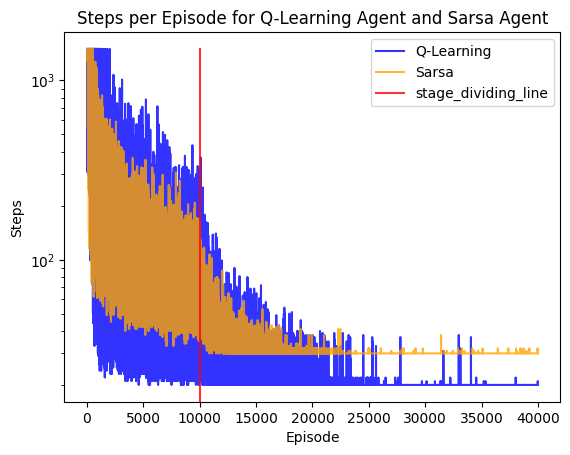

q_mean: 20.0    std: 0.0
a_mean: 30.0    std: 0.0


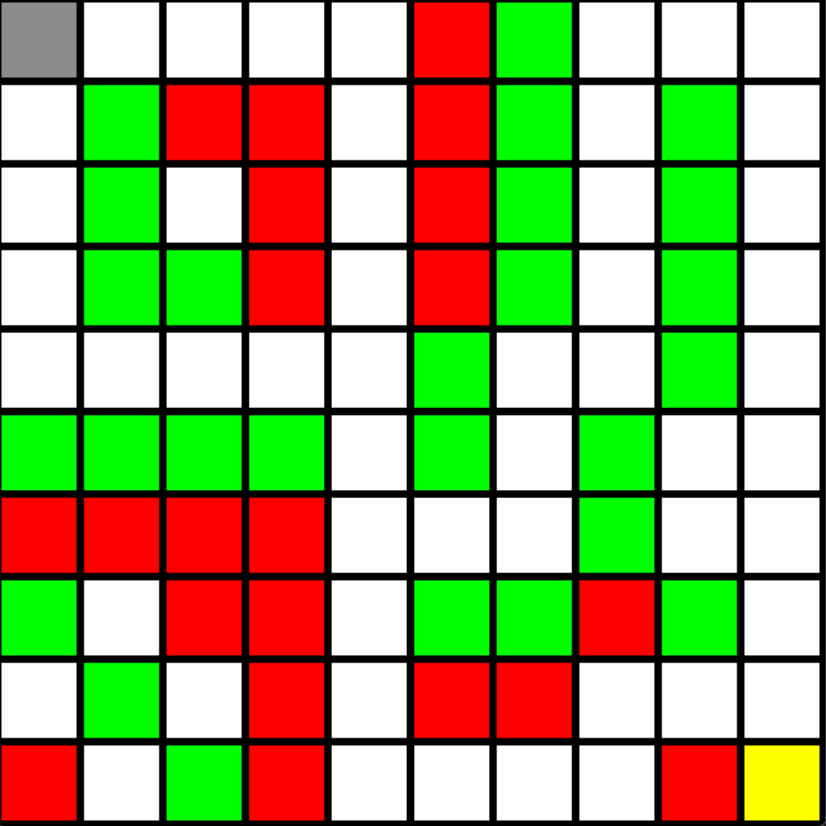

In [7]:
map_name="map_1"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])

Image(filename="map_1.png",width=400,height=400)  

## This map is divided into two parts: the first part has two paths, one surrounded by walls and the other surrounded by cliffs (high risk, same reward), and since both paths have the same number of steps, q-learning and sarsa will choose the path surrounded by walls. The second part also has two paths, one surrounded by walls and the other surrounded by cliffs, but the path surrounded by cliffs is shorter (high risk, high reward). Q-learning will choose the path surrounded by cliffs, while sarsa will choose the path surrounded by walls.
## In terms of the number of steps, q-learning uses far fewer steps than sarsa.

qlearning
[[827 827 827 808 790 799   0 781 781 799]
 [836 827 836   0   0 790 764 772   0 808]
 [846 836 827 827 827   0   0   0 808 808]
 [799 846 855   0 817 790 790   0 836   0]
 [  0 799 865   0   0   0   0   0 846 846]
 [  0 884   0   0   0 894 915 894   0 846]
 [  0 875   0 988   0 894 915   0 865 855]
 [  0 884   0 978 956   0 915 915   0 875]
 [894 904 904   0 946 946 925   0 884 875]
 [884   0 925 946 935 946 935 915 915 884]]
sarsa
[[-49  77 -20 122 659 648   0 731 752 799]
 [-92 -88 -85   0   0 703 662 772   0 754]
 [-88 -70 -43 -97 -98   0   0   0 792 764]
 [-85 -79 -93   0 -98 -98 -98   0 836   0]
 [  0 -31 -96   0   0   0   0   0 811 821]
 [  0 -84   0   0   0 199 422 107   0 865]
 [  0 -52   0 974   0 174 224   0 844 832]
 [  0   0   0 963 978   0 471 452   0 842]
 [-63  13 291   0 934 927 817   0 756 894]
 [-72   0 390 589 874 946 935 925 872 883]]


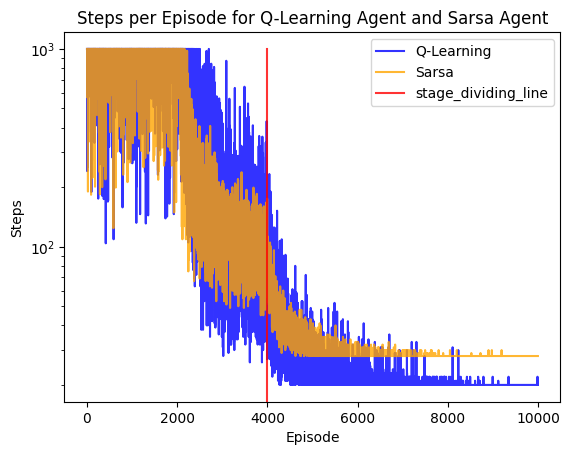

q_mean: 18.005000000000003    std: 0.0705336798983294
a_mean: 28.0    std: 0.0


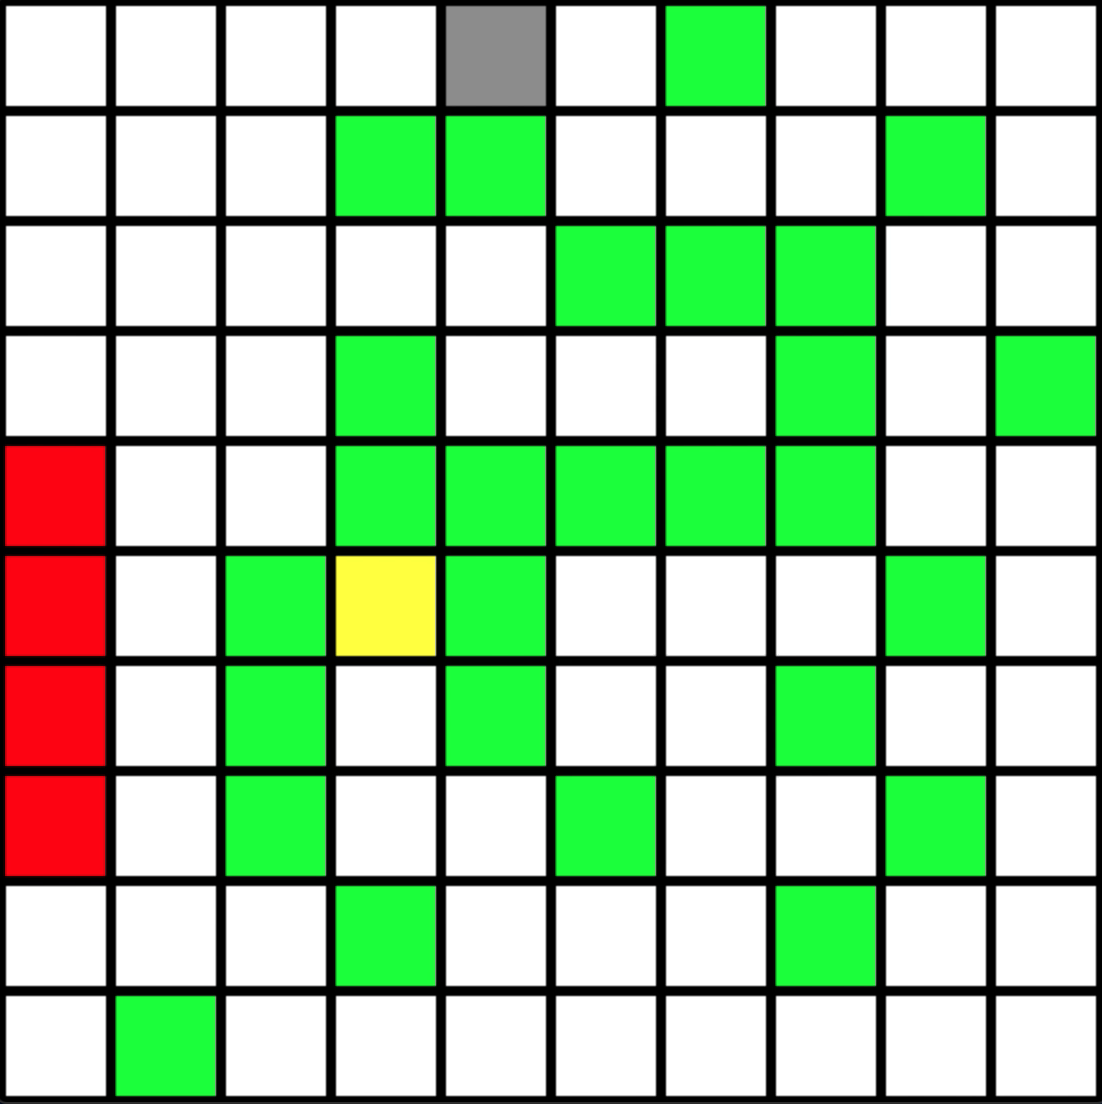

In [8]:
map_name="map_2"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_2.png",width=400,height=400)  

## this map has two paths, one is surrounded by walls, and the other is surrounded by cliffs, but the path surrounded by cliffs is shorter (high risk and high reward). Q-learning will choose the path surrounded by cliffs, while Sarsa will choose the path surrounded by walls.

## Q-learning uses fewer steps than Sarsa.

qlearning
[[817   0 799 781 790 790 799 799 817 827]
 [836 827 817   0 781   0   0 808   0 827]
 [836   0 808   0 764   0 875   0   0 846]
 [846 817   0   0   0   0 884   0 846 846]
 [  0 875 817 817 904 894 904   0   0 875]
 [779   0   0   0 894   0 915 894 875 884]
 [805 511  53   0 904 925 904   0   0   0]
 [855   0 227   0   0 935   0   0   0   0]
 [884   0   0 935 925 956 946   0   0   0]
 [875 904 904 925 915   0 978 988 999   0]]
sarsa
[[738   0 725 742 790 759 783 791 802 803]
 [621 707 702   0 168   0   0 410   0 846]
 [160   0 272   0 147   0 275   0   0 835]
 [ 51  12   0   0   0   0 308   0 490 828]
 [  0 -74  24 211 220 369 899   0   0 875]
 [-60   0   0   0 690   0 889 886 867 856]
 [-37 -38 -62   0 204 905 909   0   0   0]
 [-13   0  -3   0   0 933   0   0   0   0]
 [ 52   0   0 558 673 932 955   0   0   0]
 [204 190 219 439 641   0 966 977 988   0]]


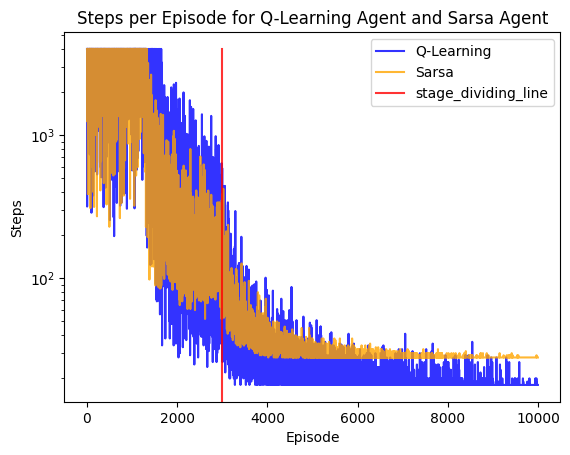

q_mean: 18.0    std: 0.0
a_mean: 28.0    std: 0.0


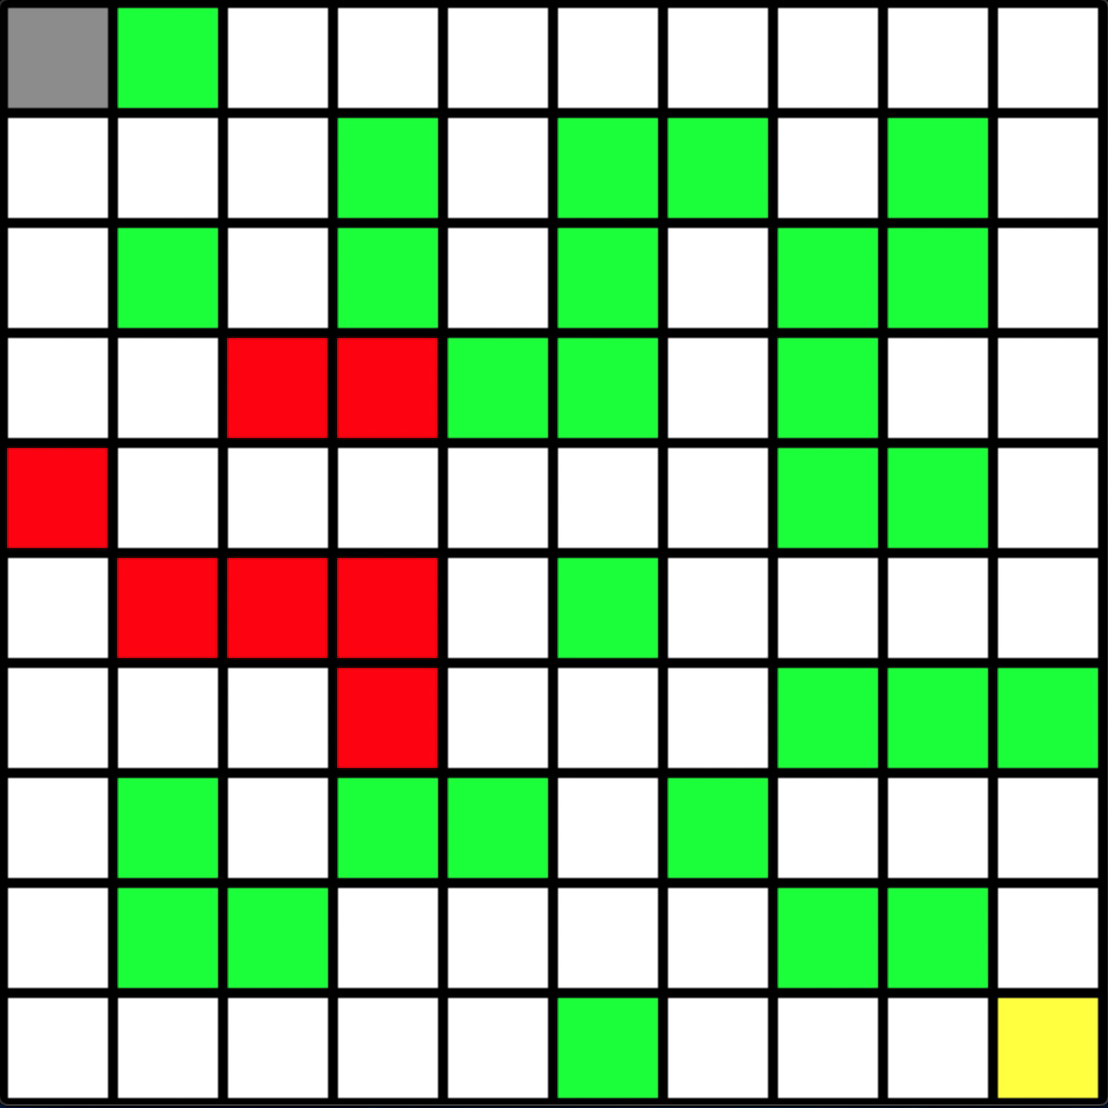

In [9]:
map_name="map_3"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_3.png",width=400,height=400)  

## this map has two paths, one is surrounded by walls, and the other is surrounded by cliffs, but the path surrounded by cliffs is shorter (high risk and high reward). Q-learning will choose the path surrounded by cliffs, while Sarsa will choose the path surrounded by walls.

## Q-learning uses fewer steps than Sarsa.

qlearning
[[808 808 808 790   0 915 946 946 956   0]
 [808 808 817 799   0 925 915   0 956 978]
 [827 817 817   0 884 894 904   0 799 978]
 [827 836   0 884 799   0 894   0 978   0]
 [  0 855 846 855 865   0 891   0 988 999]
 [755   0 855 865 855   0   0   0   0 978]
 [789 816   0 846   0 855 875 875   0 967]
 [816 827 836 827   0 865   0 884   0 956]
 [790 816   0   0 836 846   0 904   0 935]
 [790 790 808 808 836 836   0 925 925 925]]
sarsa
[[-22 124 688  61   0 -86 -40 -91 -53   0]
 [ 44 690 696 142   0 -80 -91   0 -28 221]
 [239 632 704   0 -75 -86 -96   0 -75 397]
 [272 721   0   4 -58   0 -99   0 816   0]
 [  0 685 738 124  95   0 -98   0 851 999]
 [ 56   0 705 674 241   0   0   0   0 988]
 [154 751   0 734   0 848 854 876   0 954]
 [722 754 744 743   0 865   0 904   0 954]
 [458 762   0   0 817 814   0 915   0 942]
 [499 784 794 827 836 588   0 908 919 922]]


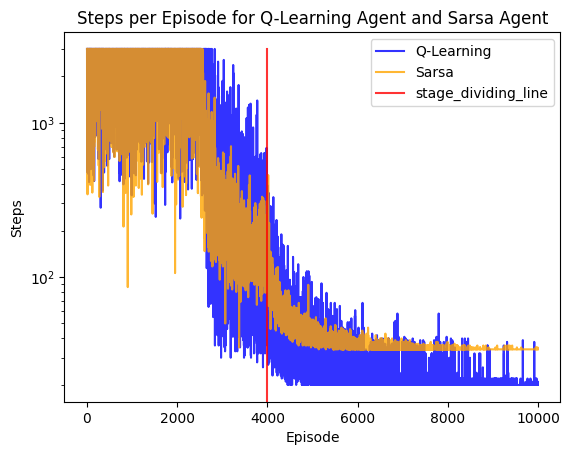

q_mean: 20.02    std: 0.19899748742132398
a_mean: 34.0    std: 0.0


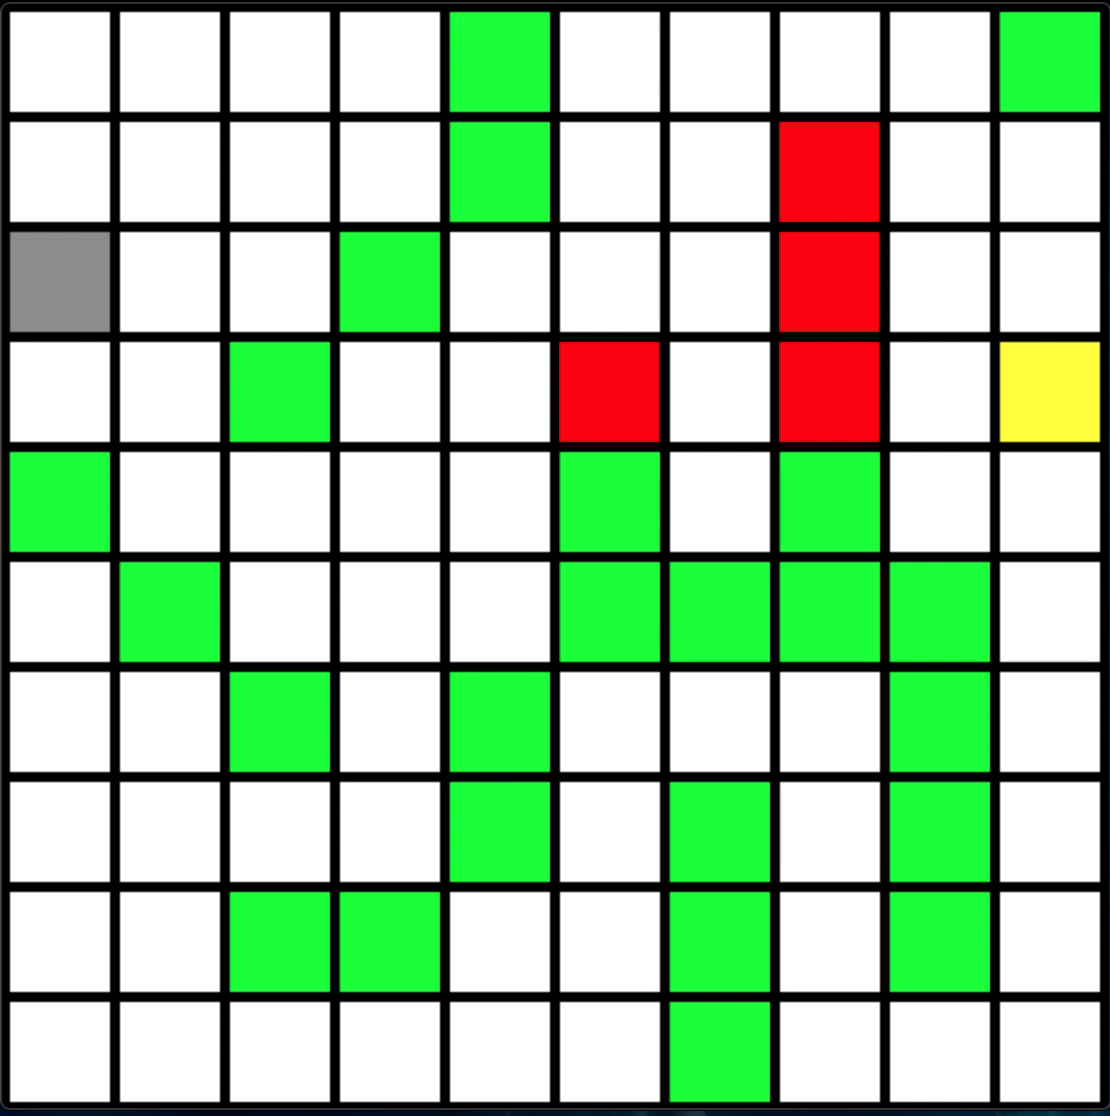

In [10]:
map_name="map_4"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_4.png",width=400,height=400)  

## this map has two paths, one is surrounded by walls, and the other is surrounded by cliffs, but the path surrounded by cliffs is shorter (high risk and high reward). Q-learning will choose the path surrounded by cliffs, while Sarsa will choose the path surrounded by walls.

## Q-learning uses fewer steps than Sarsa.

qlearning
[[925 935 935   0 956 935 935   0 915 915]
 [935 925 956   0 978 946 935 946 935 915]
 [946 935 946 956 967 956 946 956 925 915]
 [935 925   0 865 978 967   0 925 935   0]
 [  0 935 904   0   0   0   0   0 925 904]
 [  0 904 894 894   0 855   0 894 904   0]
 [  0 894 894 894 865 855   0 884   0 855]
 [875 884   0 865 875 855   0 865 865 865]
 [884 875 884 865 855   0   0 855 865 846]
 [875 865 875   0 846 836 836 865 855 846]]
sarsa
[[-52 -52 -50   0 542 617 614   0 582 331]
 [-51 -49 -50   0 304 960 698 645 428 601]
 [-60 -53 -44 907 738 978 923 921 943 610]
 [-76 -88   0 268 971 964   0 926 914   0]
 [  0 -69   0   0   0   0   0   0 877 673]
 [  0 -54 -71  59   0 -33   0 883 890   0]
 [  0 -61 128  61 111  -6   0 852   0 354]
 [174  69   0 382 243 224   0 848 540 524]
 [736 416 808 764 727   0   0 816 849 364]
 [736 717 764   0 791 846 810 865 509 354]]


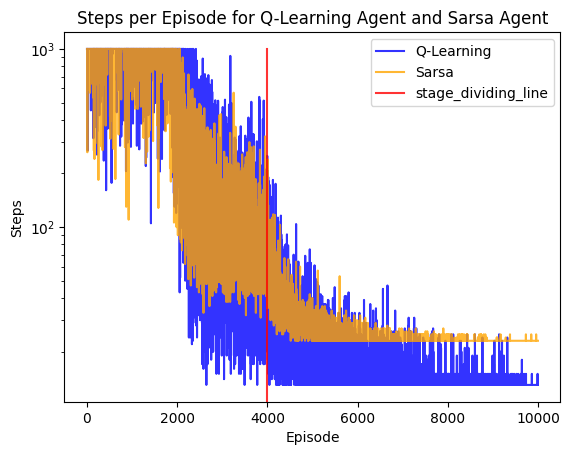

q_mean: 16.0    std: 0.0
a_mean: 23.0    std: 0.0


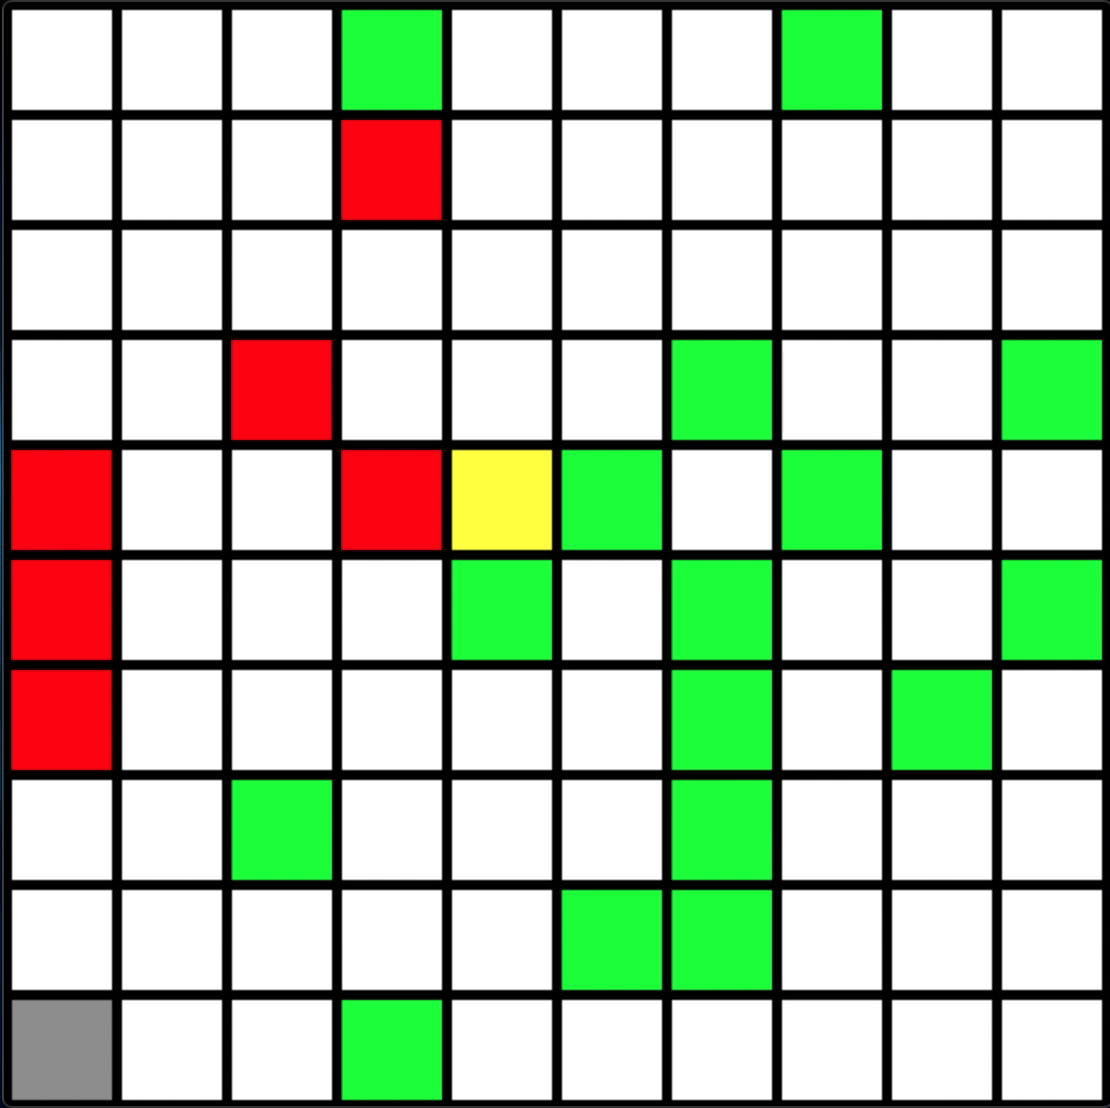

In [11]:
map_name="map_5"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_5.png",width=400,height=400)  

## this map has two paths, one is surrounded by walls, and the other is surrounded by cliffs, but the path surrounded by cliffs is shorter (high risk and high reward). Q-learning will choose the path surrounded by cliffs, while Sarsa will choose the path surrounded by walls.

## Q-learning uses fewer steps than Sarsa.

qlearning
[[8627 8720 8720 8814 9504 9602 9005 9999    0 9971]
 [9219 8627 8720 9504 9602 9005 9602 9201 9799 9761]
 [9034 9219 8627 8909 8814 8909 8510 9798 9200 9799]
 [9034 8051 8307 8260 8340 7814 8164 9699 9088 9412]
 [6851 7466 8112 6384 5974 5798 5582 6386 7450 5625]
 [6560   99 6204  394  730 2612 1940 4278 8972 1317]
 [1601  952 1324   17  793  423 3948 4261  842  792]
 [  65    0   -2    3   23   69   34   37  217  803]
 [  -2   -1   -2   -2    3    0   21   10    0   85]
 [  -2   -2   -2   -1   11    0    0   15   -1   -1]]
sarsa
[[  187 -1327  -357 -1104 -1261   558  2310  5574     0  9999]
 [ 7975  -993 -1422 -1553  -886   123  1736  9790  9624  9889]
 [  896 -1387 -1202 -1353 -1075   -97  -572   792  8091  9761]
 [ 8146  1676 -1432  -251  -954  -122  2822  9328  7826  7793]
 [ 3109   922   236  -995 -1028  -225    30  9087  9700  7623]
 [ 8322   262  -377   355   -80   -71  1137  4778  9602  5416]
 [ 3987   683   243   135    75   581  8231  6915  9504  5885]
 [ 5107   92

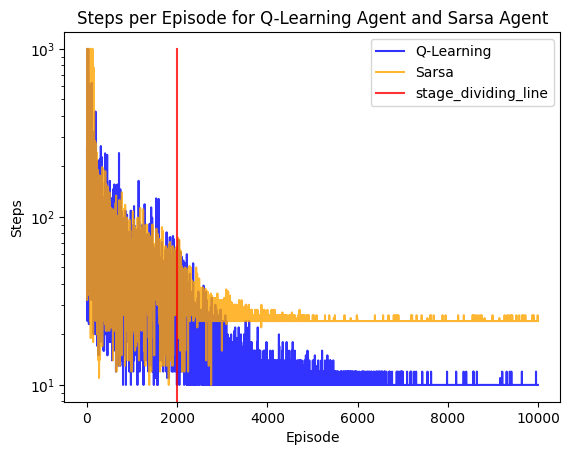

q_mean: 10.0    std: 0.0
a_mean: 26.035000000000004    std: 0.25253712598348776


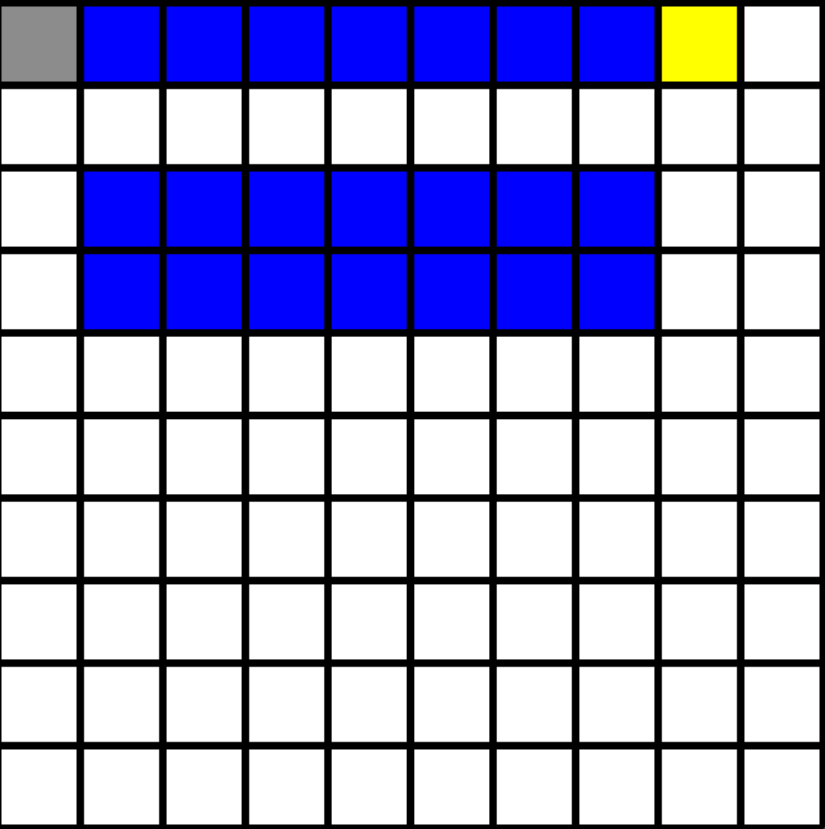

In [12]:
map_name="map_6"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_6.png",width=400,height=400)  

## The shortest path on this map is to start from the top left corner, go through the middle of the marsh, and reach the endpoint at the top right. In addition, you can also go through the bottom of the map. Going through the marsh will reduce the reward. Q-learning will ultimately choose the shortest path, while sarsa will choose to stay away from the marshes to avoid risks (losing rewards).

qlearning
[[8328 8413 8586 8674 8586 8852 8762 8852 9126 9034]
 [7829 7914 8209 8586 8377 8263 8353 8942 9219 9313]
 [8126 7829 8293 8000 8087 8175 8463 8353 8627 9313]
 [8209 8126 8209 8463 8550 8463 8550 8814 8226 9504]
 [8288 8209 8463 8377 8632 8720 8814 9408 9504 9408]
 [8207 8293 8545 8632 8720 9313 9408 9005 9602 9005]
 [8284 8545 8632 8545 8632 8720 9313 9602 9201 9799]
 [8352 8456 8545 8632 9408 9504 9602 9504 9300 9201]
 [8620 8519 9313 8720 9504 9408 9504 9602 9201 9898]
 [9219 8626 9408 9408 9602 9504 9700 9799 9898    0]]
sarsa
[[ 6174 -2908 -3750 -3668 -3818 -3957 -3960 -3767 -4443 -3550]
 [ 6740  7033   -75 -3820 -4473 -3943 -4412 -4417 -3747 -3330]
 [ 6725   -41  -787 -1951 -1925 -2786 -3768 -4503 -4902 -4511]
 [ 6972  3982  5465 -1684 -1692 -4104 -1951 -2199 -2282 -2397]
 [ 7695  5317  1378 -1231 -1962 -1677 -1342 -2422 -2472 -2228]
 [ 8350  8086  7535  5345  1693    36   228  -100   149  3424]
 [ 7930  3347  7930  8648  9211  3811  2990  2401  3324  5421]
 [ -130   65

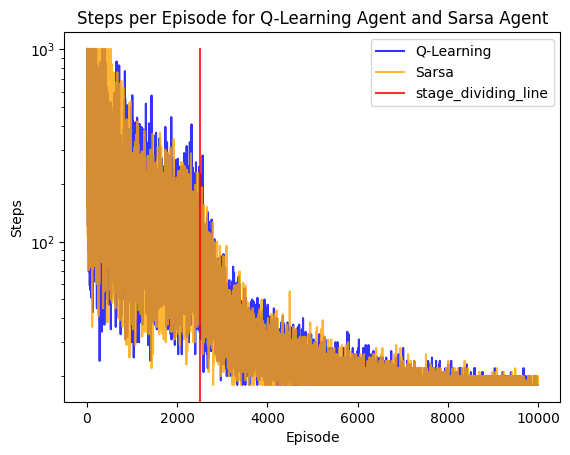

q_mean: 18.015    std: 0.15740076238697193
a_mean: 18.029999999999998    std: 0.24310491562286438


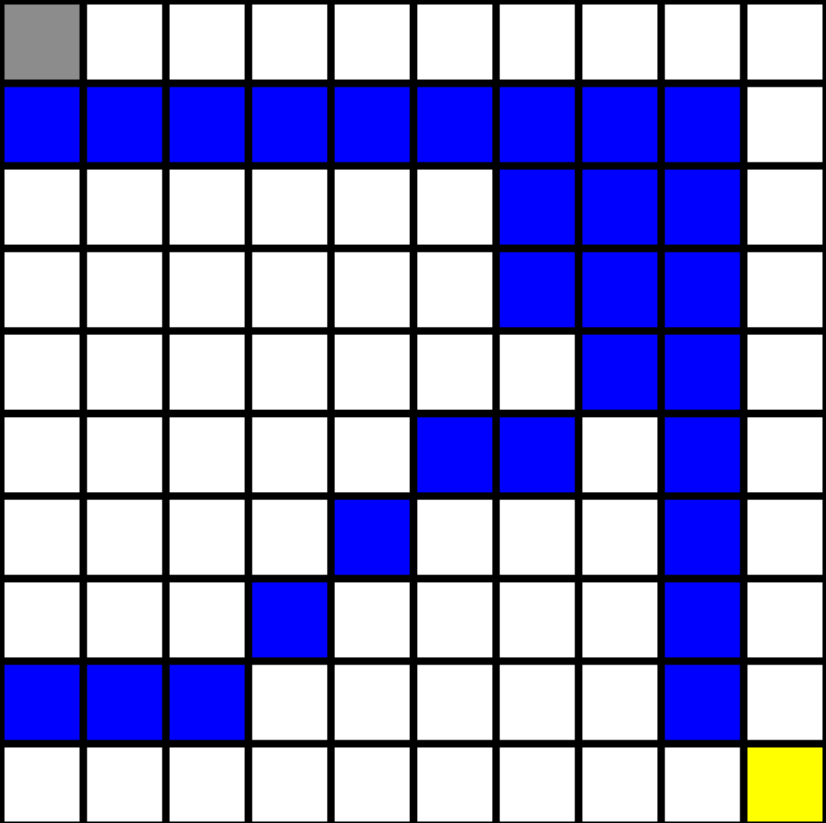

In [13]:
map_name="map_7"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_7.png",width=400,height=400)

## There are two methods for this map: one is to go through the top right corner and then down to the endpoint, and the other is to cross the narrow marsh diagonally from the top left corner to the bottom right corner. 
## From the q-table, it can be seen that q-learning thinks that the former route has a higher reward without crossing the marsh and chooses that route, while sarsa thinks that the risk of losing rewards in the top right corner is higher, in case having many marshes, so it chooses the latter route.
## There's no difference of the steps between these two routines.

qlearning
[[8106 8106 8357 8091 8294 8499 8706 8915 9126 9219]
 [8268 8357 8324 8357 8499 8294 8499 9007 9219 9219]
 [8473 8443 8529 8324 8706 8797 8889 8797 9194 9219]
 [8473 8529 8324 8825 8915 8706 9100 9007 9100 9313]
 [8560 8616 8410 8797 8706 9100 9313 9408 9313 9289]
 [8647 8647 8616 8889 8797 9313 9408 9385 9408 9700]
 [8647 8735 8706 8915 9194 9291 9504 9483 9700 9799]
 [8735 8825 9219 9126 8982 9385 9602 9700 9483 9700]
 [9126 9219 9126 9219 9504 9291 9700 9602 9700 9999]
 [9126 9126 9219 9313 9602 9385 9700 9799 9999    0]]
sarsa
[[ 8184  7902 -1037 -1979 -1842 -1692 -1894 -1895 -1239 -1016]
 [ 7947  3854  4508  -398 -2063  -737 -1920  -753 -1505 -1139]
 [ 7355  3404   505  -498 -1418  -683   762  -918   779  -313]
 [ 7784  3610   924  2806  2375   387  -721  -896   577   -41]
 [ 8645  8522  6358  1145  2008  3497  2663  2411  1203  5127]
 [ 8378  7414  4233  2475  5025  2884  4836  6005  4670  6813]
 [ 8624  6726  5683  5084  3303  3253  5977  7657  6558  7227]
 [ 8728  873

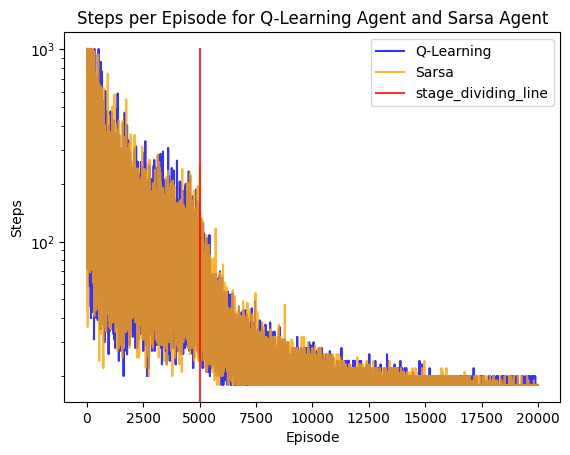

q_mean: 18.02    std: 0.19899748742132398
a_mean: 18.015    std: 0.15740076238697193


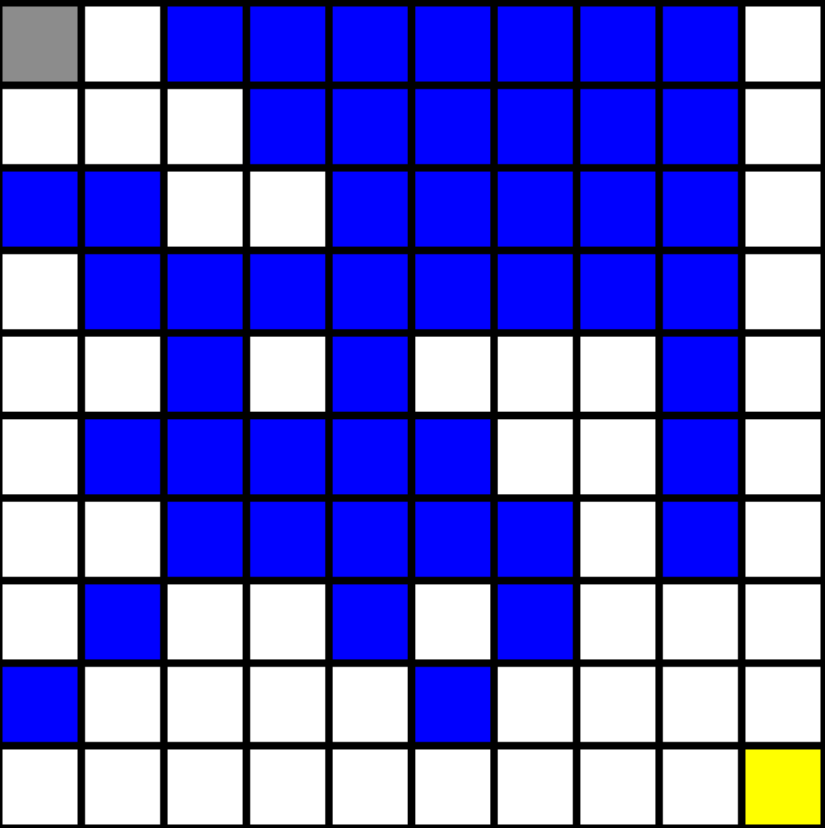

In [14]:
map_name="map_8"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_8.png",width=400,height=400)

## There are two routes on this map: one is to go through the bottom left corner and then to the right to reach the endpoint, and the other is to through the narrow marshes diagonally from the top left corner to the bottom right corner. Both routes pass through two marshes (with the same reduction in reward and the same number of steps), but the latter encounters the marsh later than the former. 
## Q-learning chooses the latter, while sarsa chooses the former because there are too many marshes in the middle and upper right part of the map, resulting in a negative q-value.

qlearning
[[970 969 970 968 967 932 932 983 982 982]
 [971 972 969 968 981 982 983 982 983 984]
 [971 971 927 979 931 981 982 938 984 983]
 [973 972 973 927 979 890 930 986 987 986]
 [973 975 927 977 978 930 892 987 988 985]
 [922 925 926 892 942 892 940 988 946 937]
 [922   0   0   0 892 991 990 989 939 897]
 [940   0   0   0 942 945 946 945 946 947]
 [940   0   0   0 994 995 945 997 996 999]
 [941 943 943 944 994 996 996 997 997   0]]
sarsa
[[ 832  858  167  -13 -695 -635 -583 -515 -525 -458]
 [ 859  864  456  -29 -605 -693 -523 -590 -455 -442]
 [ 869  568  361  262 -480 -626 -616 -642 -312 -255]
 [ 859  553  314   23 -361 -603 -506 -384 -453 -347]
 [ 888  439  583  -92   27 -377 -364 -461 -152 -119]
 [ 837  554  325   88 -184 -266   94  146  471  114]
 [ 879    0    0    0  352  601  349  355  425  274]
 [ 932    0    0    0  801  764  800  575  793  962]
 [ 932    0    0    0  979  995  996  957  943  999]
 [ 942  935  935  939  979  993  996  997  995    0]]


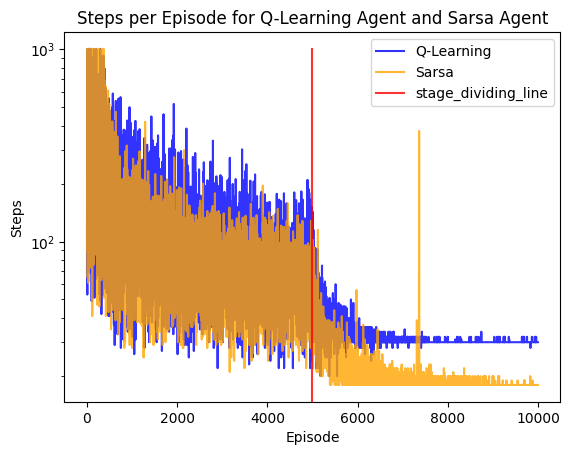

q_mean: 30.025    std: 0.21065374432940895
a_mean: 18.035    std: 0.25253712598348776


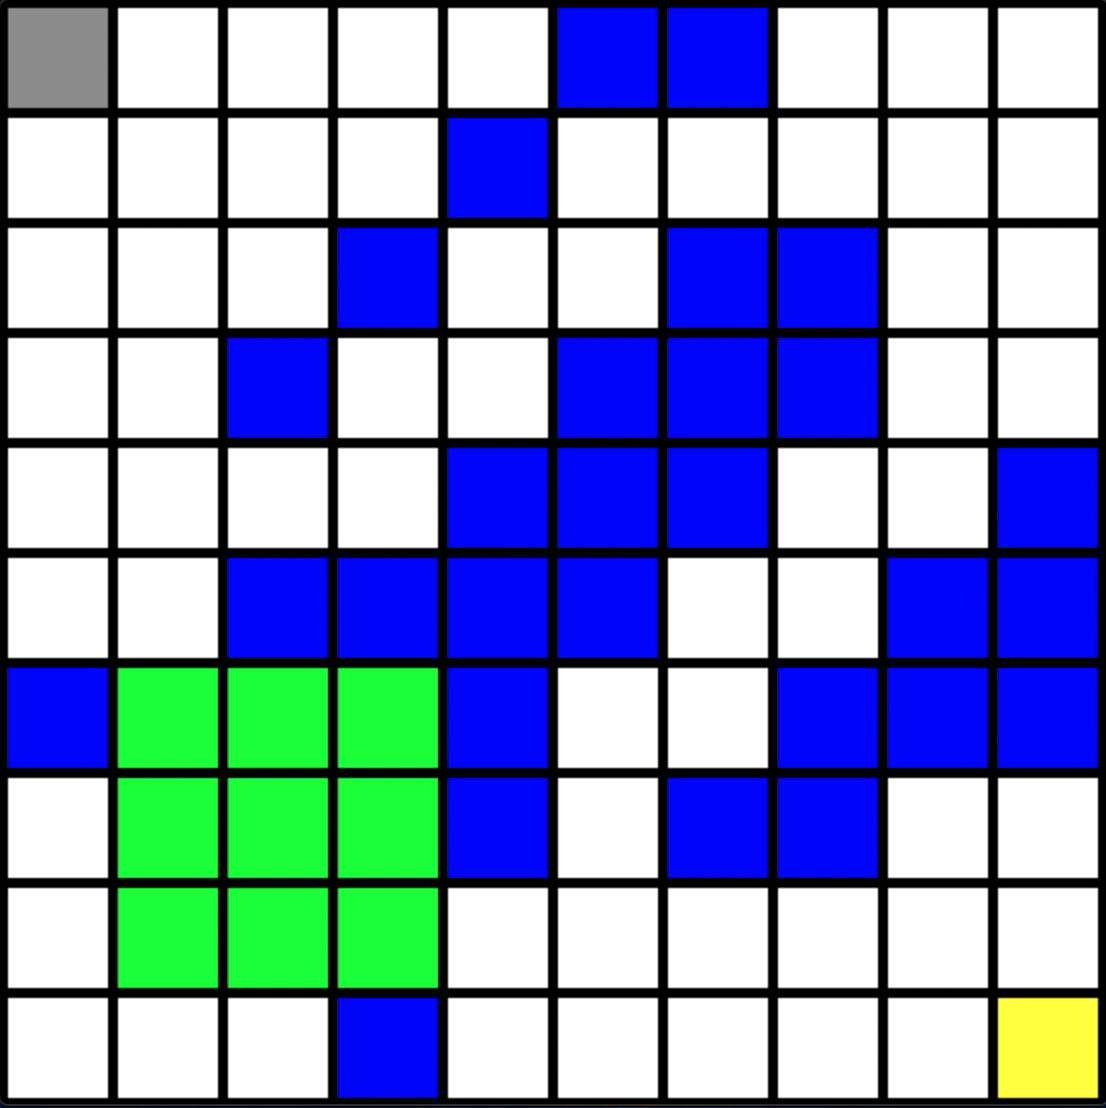

In [15]:
map_name="map_9"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_9.png",width=400,height=400)

## There are two kinds of routes on this map: one is to go through the bottom left corner and then to the right to reach the endpoint (with two marshes - - reduction in reward), and the other is to go through this map without touching marshes from the top left corner to the bottom right corner. The first route has fewer steps, which is in danger of reducing the reward, while the other route is the opposite.


## Sarsa chooses the fewer steps, while Q-learning chooses the less reduction in reward. 

qlearning
[[827 799 799   0 799 817 817   0 846 836]
 [817   0 790   0 790   0 836   0 855 855]
 [836   0 781 781 781   0 836 846 846 875]
 [836 836   0   0   0   0   0   0   0 875]
 [846 836 875 884 885   0 915 915 884 875]
 [875 865 894 865 894   0 925   0   0   0]
 [884 875 904 896 885   0 946 946 956 967]
 [875 904 894 904 935 916   0   0   0 967]
 [884 894 925 915 946 935 967 956 967 978]
 [894 885 885 915 906 906 929 959 969   0]]
sarsa
[[ 628  680  755    0  745  786  783    0  506  558]
 [ 444    0  764    0  757    0  791    0  716  730]
 [ 487    0  720  781  724    0  845  821  840  839]
 [-343 -372    0    0    0    0    0    0    0  864]
 [-194 -386 -396 -369 -371    0  905  895  889  894]
 [-389 -394 -373 -371 -369    0  935    0    0    0]
 [-390 -387 -394 -364 -338    0  929  956  940  964]
 [-387 -379 -345 -339 -318  -14    0    0    0  975]
 [-389 -392 -364 -333 -271   43  357  289  926  976]
 [-390 -367 -388 -152   30    5  519  251  681    0]]


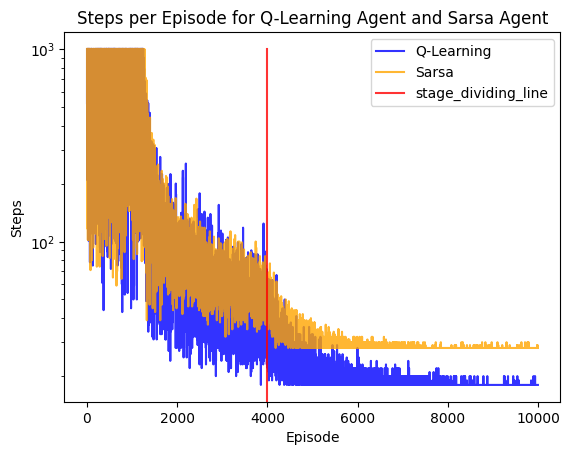

q_mean: 18.009999999999998    std: 0.14106735979665885
a_mean: 28.029999999999994    std: 0.19773719933285192


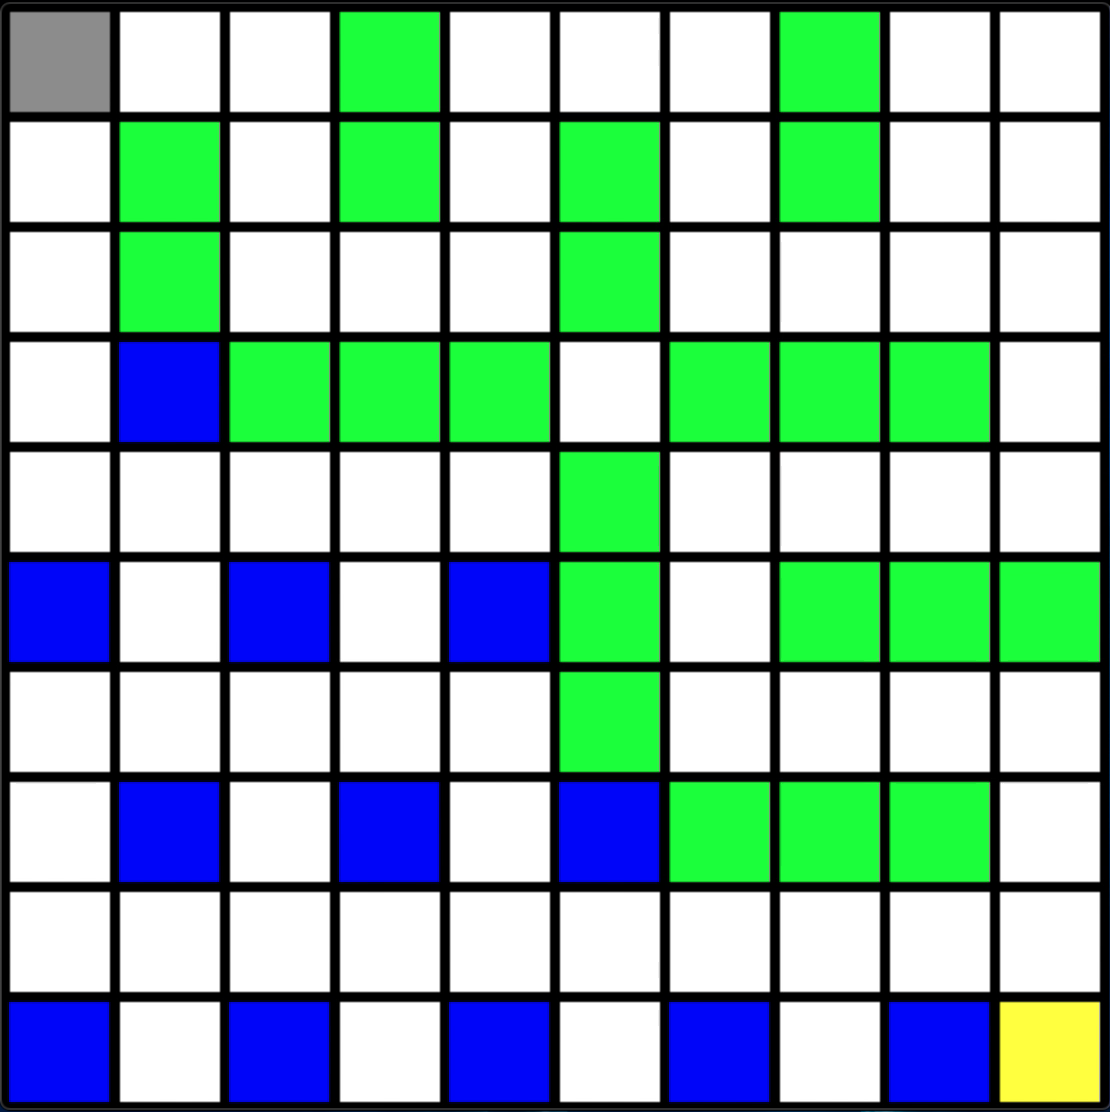

In [16]:
map_name="map_10"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_10.png",width=400,height=400)

## There are two areas on this map: one is filled with marshes, and the other is filled with walls. So there are two choices for them: one has fewer steps with danger of reduction in reward and the other is contrary.

## Q-learning chooses fewer steps while Sarsa chooses safer. 

qlearning
[[7469 7546 7295 7531 7469    0    0    0    0    0]
 [7466 7283 7556 7606 7942 7860    0    0    0    0]
 [7557 7453 6553 7521 8023    0    0    0    0    0]
 [7740 7657 8271 8004 8105 7177    0    0    0    0]
 [8354 8271 8356 7470 7470 7075    0    0    0    0]
 [8440    0    0    0    0    0    0    0    0    0]
 [8614 7469 7469 8973 4650  777 8902    7   49   50]
 [8472 8693 9219 8706 8899 6382 6145 9564 9053    5]
 [9017 9219 8877 9408 9313 8657 9412 9476 7068  364]
 [   0    0    0 9348 9602 9504 9799 9700 9799    0]]
sarsa
[[ 6475  3859 -1260 -1565 -2346     0     0     0     0     0]
 [ 6466  5738 -2490 -2273 -2674 -2496     0     0     0     0]
 [ 8093 -1088 -1006 -2211 -2265     0     0     0     0     0]
 [ 8426  7765 -2080 -1077 -1924 -2460     0     0     0     0]
 [ 7237  4211 -1141 -1544 -2115 -2435     0     0     0     0]
 [ 6219     0     0     0     0     0     0     0     0     0]
 [ 8026  3281 -1802  -229 -1554 -1119  3335  1028     2    -7]
 [ 8239  712

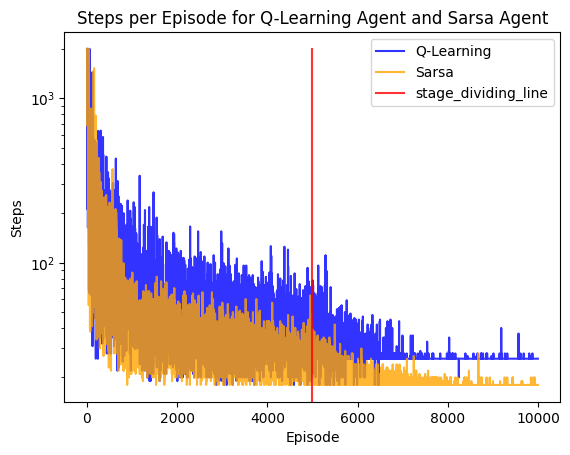

q_mean: 26.02    std: 0.19899748742132398
a_mean: 18.02    std: 0.19899748742132398


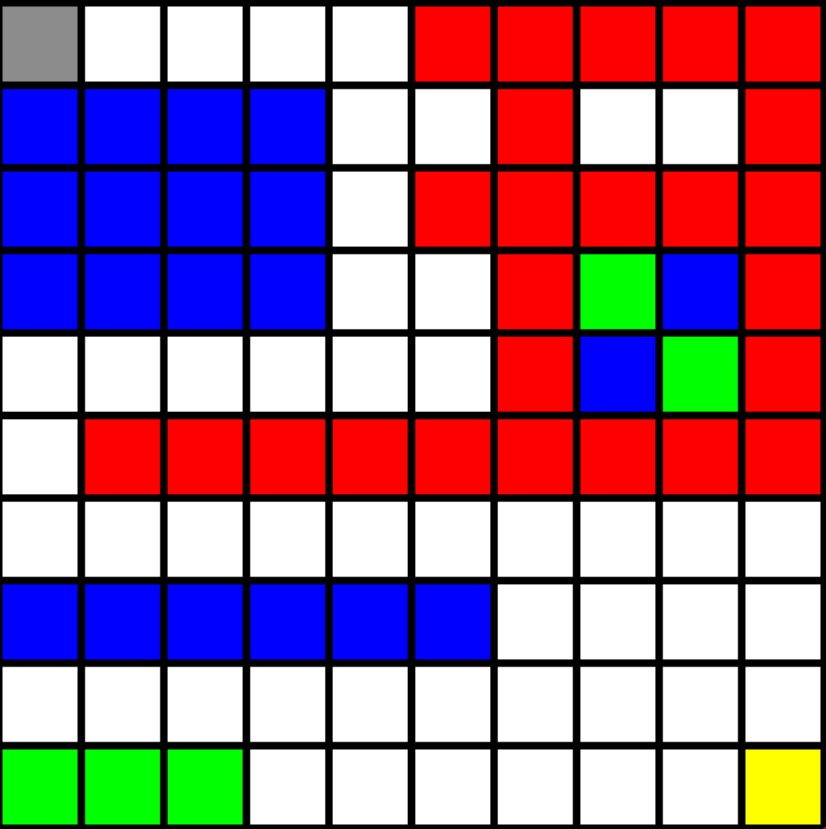

In [17]:
map_name="map_11"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_11.png",width=400,height=400)

## There are two routes on this map: one is to take the winding path between the marshes and cliffs, and the other is to go straight down through the marshes and then to the bottom right to reach the endpoint. The former does not pass through marshes, has a high reward, but more steps; the latter has a low reward but fewer steps. 
## Q-learning chooses the former (high reward), while sarsa chooses the latter because there are too many cliffs in the upper right part of the map, resulting in a negative q-value.

qlearning
[[ 53  55   0   0   5  14  -1  -1  -2  -2]
 [ 55  55   0   0  29  11  10   0  -2   4]
 [ 55  56   0   0  86   0   0  -2  -3  -8]
 [ 58  61   0   0  39   0   0   0   0  -8]
 [ 61  59   0   0   0  99  53   0   0  -9]
 [ 59  61   0   0   0   0  53   0   0  -9]
 [ 64  63   0   0   0  88  86   0   0 -10]
 [ 66  64   0   0  84  53   0   0   0 -10]
 [ 68  69   0   0  82   0   0   0   0 -10]
 [ 68  71  69  73  73  71  35  -5 -11 -11]]
sarsa
[[  3 -36   0   0  78  82  72  56  50  21]
 [  9   5   0   0  86  90  81  78  58  47]
 [  0  15   0   0  91   0   0  78  82  67]
 [ 41  23   0   0  92   0   0   0   0  67]
 [ 20  29   0   0   0  65  -4   0   0  73]
 [ 44  -7   0   0   0   0 -33   0   0  65]
 [ 19  -6   0   0   0 -15 -46   0   0  60]
 [ 28  45   0   0 -32 -54   0   0   0  59]
 [ 31  50   0   0  38   0   0   0   0  58]
 [ -2  35  53  38  56  12  44  48  53  55]]


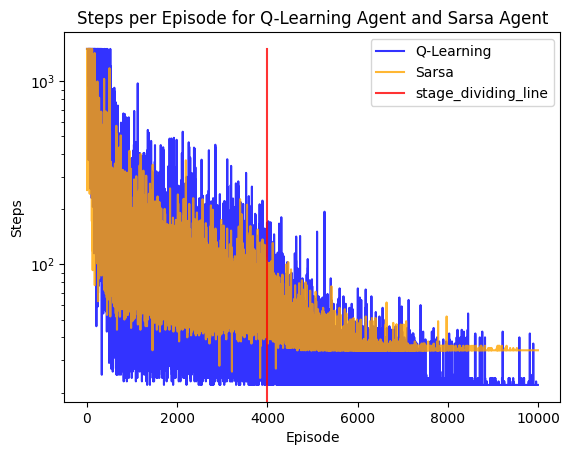

q_mean: 22.0    std: 0.0
a_mean: 34.0    std: 0.0


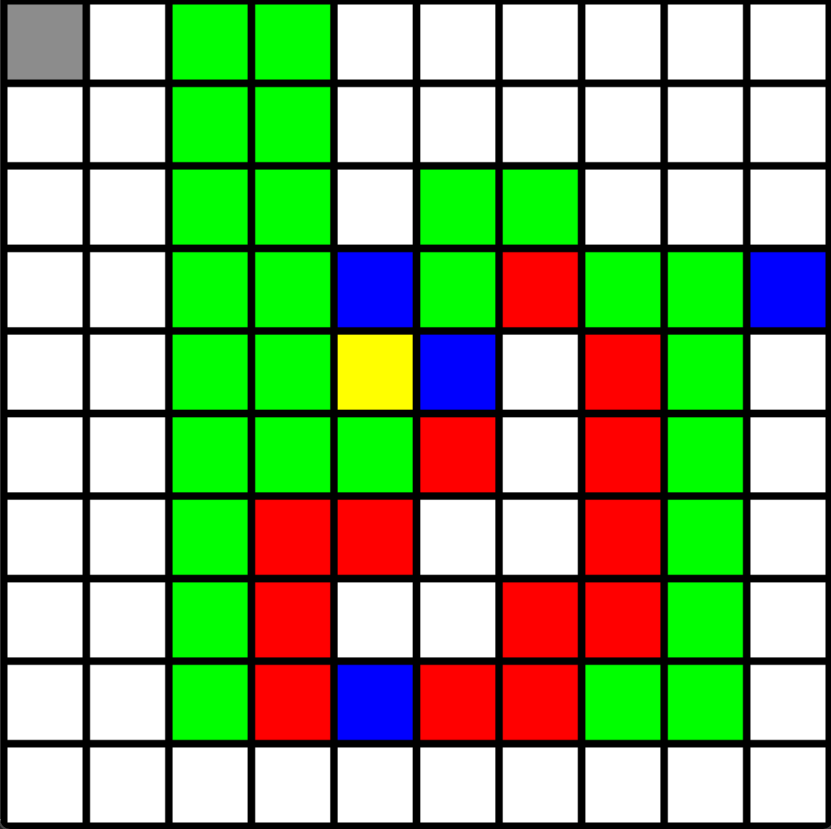

In [18]:
map_name="map_12"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_12.png",width=400,height=400)

## There are two routes on this map: after going straight down to the bottom left corner, one is to take the winding path between the cliffs, and the other is to follow the route surrounded by walls along the edge of the map to reach the endpoint. Both routes pass through two marshes, but the latter has more steps. 
## Q-learning chooses the former, while sarsa chooses the latter because there are too many cliffs in the former, resulting in a negative q-value.

qlearning
[[7677 7735 7735 8499 7814 8674 8762 8852 8762 8674]
 [7835 7657 8499 8586 8499 8762 8674 8942 8852 8762]
 [7755 7735 7814 8499 8762 8852 7677 8852 8762 8852]
 [7236 7814 7236 8586 7677    0    0 7677 9034 8942]
 [7915 8160 8413 8499    0 7677 7677 8620 9126 8942]
 [8160 7677 7561 7677    0 9313 9219 8714 8620 8415]
 [7677    0 7677    0 7569 9213 9313 8415 8714 9200]
 [   0 6700 7677 7631 7628 9313 9408 8714 8415 9107]
 [1424  562    0    0    0 7676 9700 9799 9898 9999]
 [  13    3    0    0    0    0 7677 9700 9799    0]]
sarsa
[[ 5697  4163  3092  5858  5472  7740  7823  7093  7985  7548]
 [-2409 -2757  4680   445   983  2564  4634  5010  8019  7541]
 [-4340 -4405 -3933 -4074  2636 -1755 -2359 -1884  3061  7734]
 [-5454 -5591 -6464 -4730 -3982     0     0 -1512    27  8327]
 [-5621 -5653 -6489 -6307     0 -5042 -4433  3448  1268  8413]
 [-4799 -5683 -5784 -5746     0 -4519 -1637  -650  7722  9105]
 [-4399     0 -4119     0 -5062 -3546 -2161  2359  3457  9199]
 [    0 -469

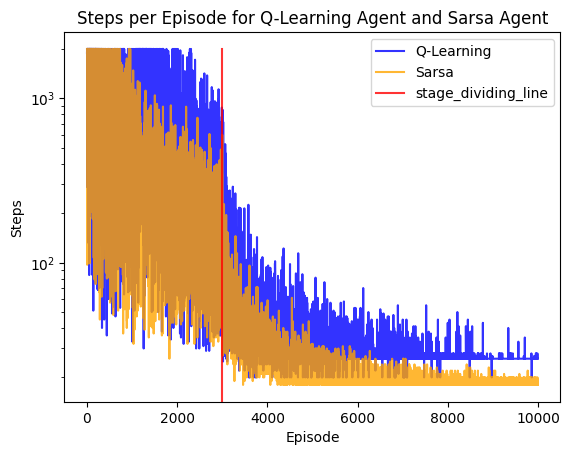

q_mean: 26.04    std: 0.27999999999999997
a_mean: 18.035    std: 0.23189437250610456


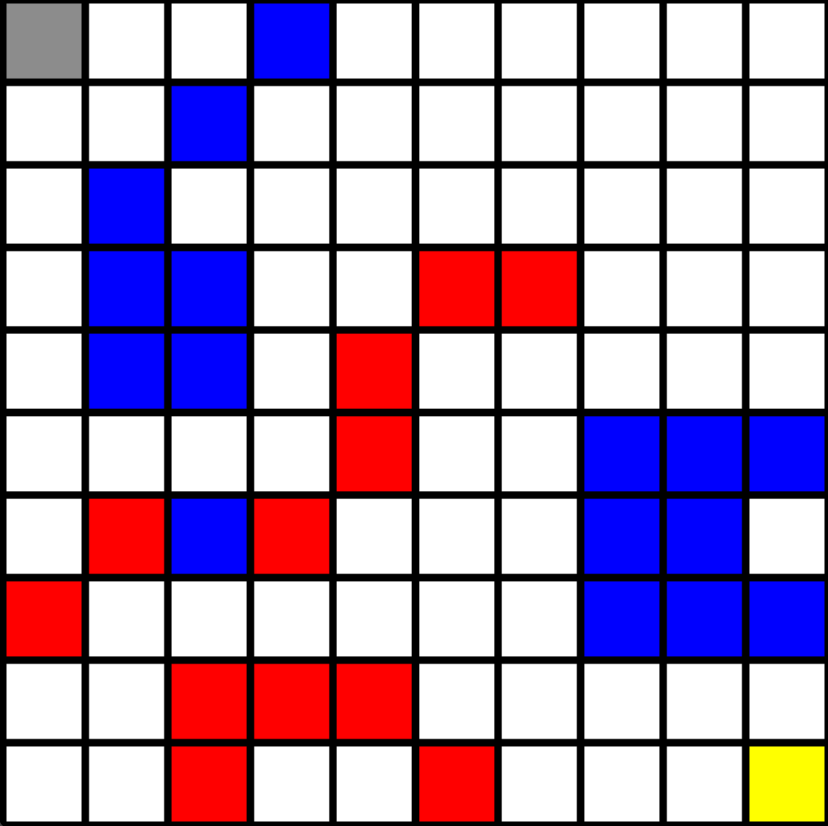

In [19]:
map_name="map_13"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_13.png",width=400,height=400)

## There are three routes on this map: the first is to go straight to the right along the edge of the map, then straight down, through 3 marshes in total to reach the endpoint; the second is to take the winding path between marshes and cliffs; the third is to follow the second route, then cross a marsh and take the path through the middle of the cliff to reach the endpoint. 
## From the perspective of reward, the second route has the least reduction, followed by the third route, and the first route has the most reduction. From the perspective of steps, the first and third routes have the least steps, while the second route has the most steps. 
## Q-learning chooses the second route(least reduction of reward), while sarsa chooses the first route because there are too many cliffs in the lower left, resulting in a negative q-value. Therefore, from a step perspective, q-learning is more than sarsa.

qlearning
[[7756 7756    0    0 7997 7832 6976 5494 1876    0]
 [7835 7915 7756    0 7677    0 6268  724    0    0]
 [   0 7915 7729 7835 8597    0 2315 1506   50  714]
 [8261 8431    0    0 8161 8597    0  264   86    0]
 [8345 8345 8431 7677    0 7677 9313    0    0 9504]
 [8261 8431    0 7677 7677 9126 7677 9313 7677 9602]
 [   0 7996 7915    0 8692 8692    0    0    0 9602]
 [7677 7915 7835    0    0 8692    0 9351 9799 9799]
 [7677    0 8282 8366 8452    0 9070 9256    0 9799]
 [   0 8282 8366 8282 8366 8538 9070 9162    0    0]]
sarsa
[[ 5887  2609     0     0  -611 -1072  -988 -1173 -1226     0]
 [ 6553  5655  2413     0  -698     0  -945 -1412     0  -217]
 [    0  5356  1065  2360  -112     0  -979  -428  -347  -295]
 [ 3031  5627     0     0   280 -1451     0  -686  -524     0]
 [ 3952  6113  6688  3256     0 -1406 -1394     0     0  6370]
 [ 4678  7608     0     8 -1650 -1417 -1642  -313   704  8715]
 [    0  7686  4956     0 -1283 -1035     0     0     0  8843]
 [ 4413  776

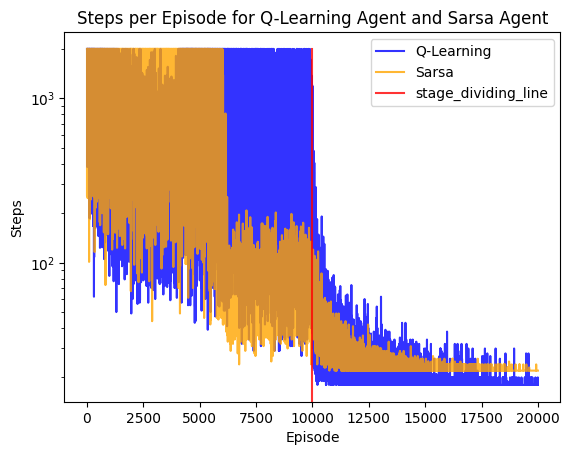

q_mean: 18.04    std: 0.5642694391866356
a_mean: 22.035    std: 0.2525371259834878


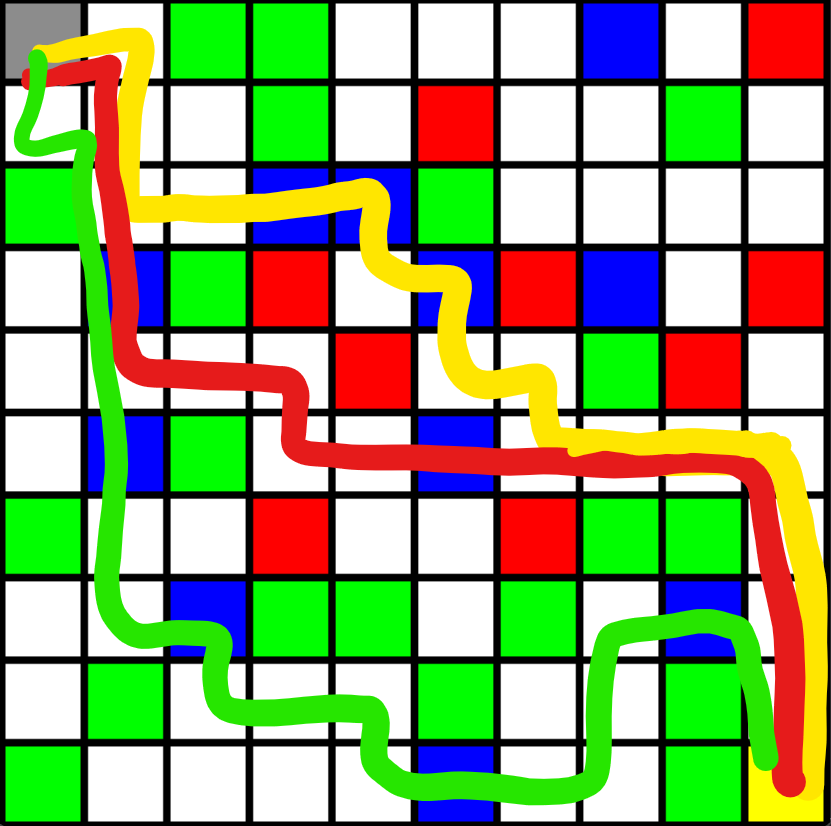

In [20]:
map_name="map_14"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_14.png",width=400,height=400)

## This map has three routes: marked in yellow, red, and green respectively. 
## From the perspective of reward, the red route has the least reduction, followed by the yellow route, and the green route has the most reduction. From the perspective of steps, the red and yellow routes have the least steps, while the green route has the most steps. 
## Q-learning chooses the red route, while sarsa chooses the green route because there are cliffs in the middle and upper right, resulting in a negative q-value. Therefore, from a step perspective, sarsa is more than q-learning.

qlearning
[[847 847 857 847 828 828 827 846 827 817]
 [  0   0 890   0   0   0   0 846   0   0]
 [925 915 838 894 884 865 855 865 855 836]
 [838   0   0 894 904 894 865 855 865 855]
 [956 838 915 904 894 904 894 865 875 865]
 [967 956 946 935 904 915 884 875 865 865]
 [956 967 935 946 915 925 894 884 875 884]
 [988 978 946 935 946 935 904 915 884 884]
 [999 988 956 946 956 946 935 904 894 904]
 [  0 988 978 956 946 935 925 935 925 904]]
sarsa
[[ 533  549  798  650  599  826  835  626  287  201]
 [   0    0  159    0    0    0    0  854    0    0]
 [  -8  -23  -57   87  381  791  510  649  452  206]
 [-104    0    0  400  750  646  689  669  376  168]
 [ -35  112   45  583  863  806  860  523  324  156]
 [ 683  179  397  523  702  788  565  498  256  141]
 [ 642  696  786  692  837  925  852  302  431  105]
 [ 967  844  815  934  946  749  610  232  190   55]
 [ 945  914  931  948  784  736  485  356  421   41]
 [   0  970  988  879  819  720  733  185   75   40]]


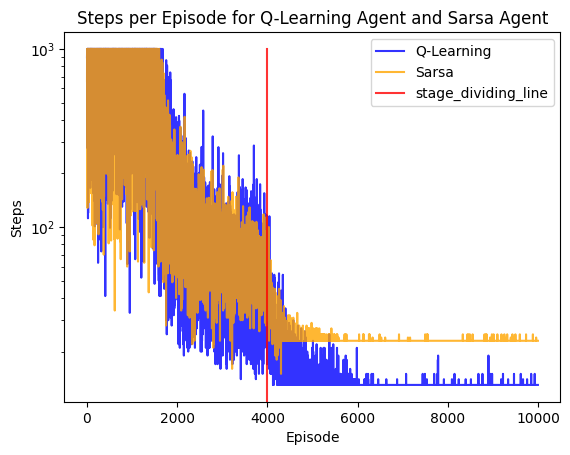

q_mean: 13.01    std: 0.09949874371066199
a_mean: 23.009999999999998    std: 0.14106735979665885


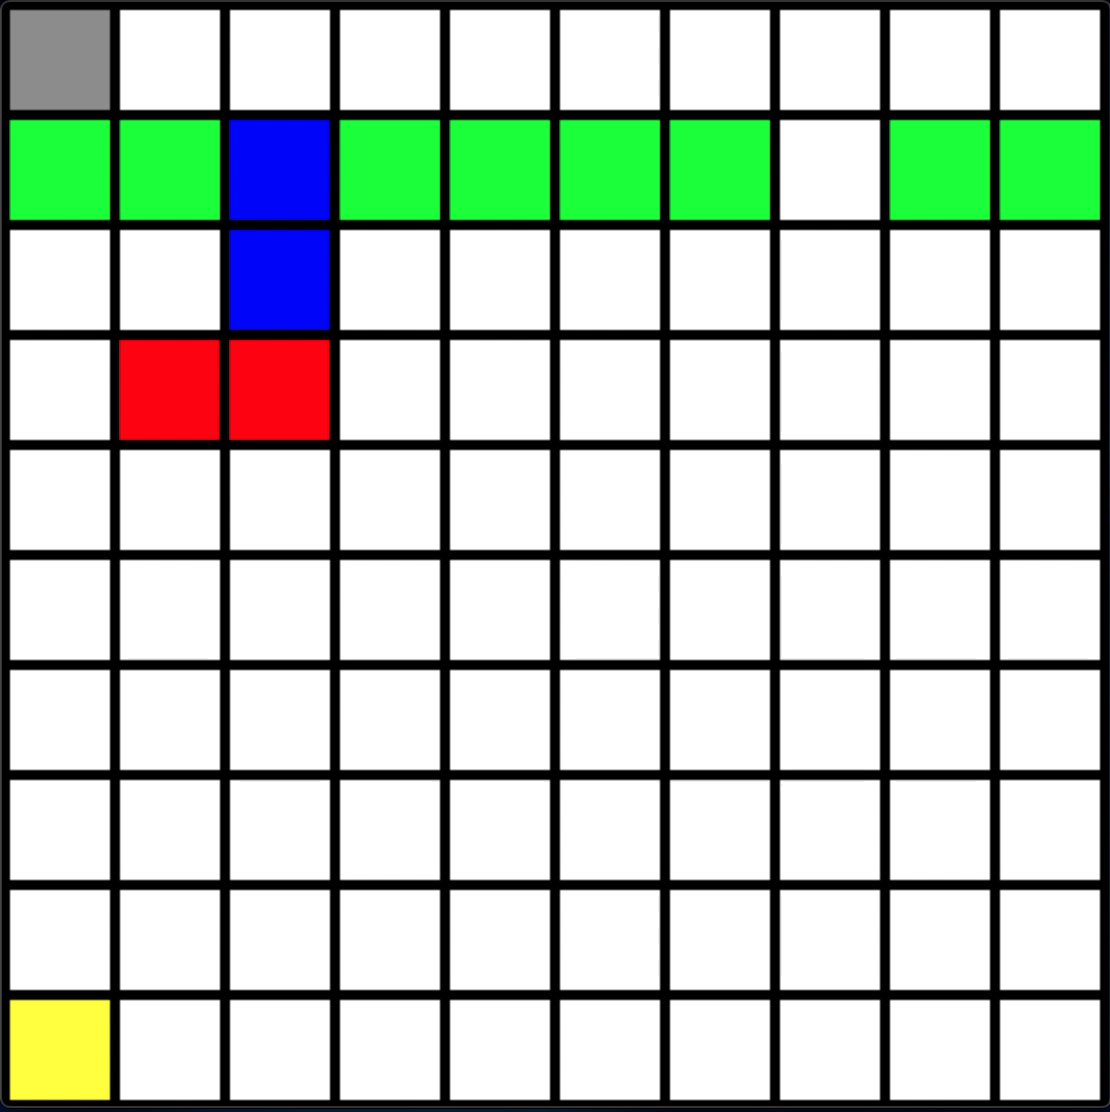

In [21]:
map_name="map_15"
map=datas[map_name]["map"]
    
# Define grid cell size and margin
CELL_SIZE = 50
MARGIN = 5

# Define colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
GREY = (140, 140, 140)

class GridWorld:
    def __init__(self, width, height, wall_positions=None, goal_positions=None, cliff_positions=None, marsh_positions=None):
        self.width = width
        self.height = height
        self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        self.wall_positions = wall_positions if wall_positions else []
        self.cliff_positions = cliff_positions if cliff_positions else []
        self.marsh_positions = marsh_positions if marsh_positions else []
        self.goal_positions = goal_positions if goal_positions else []

    def move_player(self, direction):
        x, y = self.player_position
        if direction == "up":
            y = max(0, y - 1)
        elif direction == "down":
            y = min(self.height - 1, y + 1)
        elif direction == "left":
            x = max(0, x - 1)
        elif direction == "right":
            x = min(self.width - 1, x + 1)
        
        # Check if the new position is blocked
        if (x, y) in self.cliff_positions :
            self.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        elif (x, y) not in self.wall_positions:
            self.player_position = (x, y)
        return self.player_position in self.goal_positions

    def print_grid(self):
        for y in range(self.height):
            row = ""
            for x in range(self.width):
                if (x, y) == self.player_position:
                    row += "P"
                elif (x, y) in self.goal_positions:
                    row += "G"
                elif (x, y) in self.wall_positions:
                    row += "B"
                else:
                    row += "."
            print(row)
    def is_game_over(self):
        return self.player_position in self.goal_positions
    
def Experiment_single(num_episodes, alpha, gamma, epsilon):
     # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    
    for episodeQ in range(num_episodes):
        grid_worldQ.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldQ.player_position
            action = agentQ.choose_action(state)
            reached_goal = grid_worldQ.move_player(action)
            next_state = grid_worldQ.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            agentQ.learn(state, action, reward, next_state)
            if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeQ.append(steps)
        
        if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                pickle.dump(agentQ.q_table, f)
    
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentQ.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("qlearning")
    print(mat.astype(int))

    #for l in sorted(list(agentQ.q_table.items())):
    #    print(l)
    for episodeA in range(num_episodes):
        grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
        steps = 0
        while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
            state = grid_worldA.player_position
            action = agentA.choose_action(state)
            reached_goal = grid_worldA.move_player(action)
            next_state = grid_worldA.player_position
            if reached_goal:
                reward = datas[map_name]["parameters"]["reward_final"]
            elif grid_worldA.player_position in grid_worldA.marsh_positions:
                reward = datas[map_name]["parameters"]["reward_marsh"]
            else:
                reward = datas[map_name]["parameters"]["reward_road"]
            next_action = agentA.choose_action(next_state)
            agentA.learn(state, action, reward, next_state, next_action)
            if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
            else:
                agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
            steps += 1
        steps_per_episodeA.append(steps)

        if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
            # Save the learned policy
            with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                pickle.dump(agentA.q_table, f)
            
    mat = np.zeros((10,10))
    mat_d = np.zeros((10,10), dtype=str)
    for ((x,y), d), v in agentA.q_table.items():
        mat[y, x] = v
        mat_d[y, x] = d
    print("sarsa")
    print(mat.astype(int))

    #for l in sorted(list(agentA.q_table.items())):
    #    print(l)
    # Plot the graph of steps per episode
    plt.plot(steps_per_episodeQ,color='blue', alpha=0.8,label='Q-Learning')
    plt.plot(steps_per_episodeA,color='orange', alpha=0.8,label='Sarsa')
    x=[datas[map_name]["parameters"]["steps_for_epsilon_stage1"],datas[map_name]["parameters"]["steps_for_epsilon_stage1"]]
    y=[0,datas[map_name]["parameters"]["step_limit"]]
    plt.plot(x,y, color='red', alpha=0.8, label='stage_dividing_line')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.title('Steps per Episode for Q-Learning Agent and Sarsa Agent')
    plt.legend()
    plt.yscale("log")
    plt.show()
    
def Experiment_step(num_episodes, alpha, gamma, epsilon):
    # Read the map
    n=0 #dimension of the map
    wall=[]
    cliff=[]
    marsh=[]
    goal=[]
    
    for k in map:
        n=n+1
    for i in range(n):
        for j in range(n):
            if map[i][j] == 1:
                wall.append((j,i))
            elif map[i][j] == 2:
                cliff.append((j,i))
            elif map[i][j] == 3:
                marsh.append((j,i))
            elif map[i][j] == 4:
                goal.append((j,i))
            
    grid_worldQ = GridWorld(10, 10, wall, goal, cliff, marsh)
    
    grid_worldA = GridWorld(10, 10, wall, goal, cliff, marsh)


    agentQ = QLearningAgent(grid_worldQ, alpha=alpha, gamma=gamma, epsilon=epsilon) #to experiment agent learning with diff ["parameters"]s

    agentA = SarsaAgent(grid_worldA, alpha=alpha, gamma=gamma, epsilon=epsilon)
    

    steps_per_episodeQ = []
    steps_per_episodeA = []
    q_means=[]
    a_means=[]
    q_stds=[]
    a_stds=[]
    
    
    for i in range(10):
        for episodeQ in range(num_episodes):
            grid_worldQ.player_position = (datas[map_name]["start_place_y"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldQ.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldQ.player_position
                action = agentQ.choose_action(state)
                reached_goal = grid_worldQ.move_player(action)
                next_state = grid_worldQ.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldQ.player_position in grid_worldQ.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                agentQ.learn(state, action, reward, next_state)
                if episodeQ < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentQ.epsilon = max(agentQ.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeQ), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeQ.append(steps)
        
            if episodeQ % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_q_learning_episode_{episodeQ}.pkl", "wb") as f:
                    pickle.dump(agentQ.q_table, f)
                    
        q_means.append(np.mean(steps_per_episodeQ[-21:-1]))
        q_stds.append(steps_per_episodeQ[-21:-1])
        steps_per_episodeQ=[]
                
        for episodeA in range(num_episodes):
            grid_worldA.player_position = (datas[map_name]["start_place_x"], datas[map_name]["start_place_y"])
            steps = 0
            while not grid_worldA.is_game_over() and steps < datas[map_name]["parameters"]["step_limit"]:
                state = grid_worldA.player_position
                action = agentA.choose_action(state)
                reached_goal = grid_worldA.move_player(action)
                next_state = grid_worldA.player_position
                if reached_goal:
                    reward = datas[map_name]["parameters"]["reward_final"]
                elif grid_worldA.player_position in grid_worldA.marsh_positions:
                    reward = datas[map_name]["parameters"]["reward_marsh"]
                else:
                    reward = datas[map_name]["parameters"]["reward_road"]
                next_action = agentA.choose_action(next_state)
                agentA.learn(state, action, reward, next_state, next_action)
                if episodeA < datas[map_name]["parameters"]["steps_for_epsilon_stage1"]:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate1"]), datas[map_name]["parameters"]["epsilon_min"])
                else:
                    agentA.epsilon = max(agentA.epsilon*(1-datas[map_name]["parameters"]["epsilon_decay_rate2"]*episodeA), datas[map_name]["parameters"]["epsilon_min"])
                steps += 1
            steps_per_episodeA.append(steps)

            if episodeA % (datas[map_name]["parameters"]["episodes"]/20) == 0:        
                # Save the learned policy
                with open(f"{map_name}_sarsa_episode_{episodeA}.pkl", "wb") as f:
                    pickle.dump(agentA.q_table, f)
                    
        a_means.append(np.mean(steps_per_episodeA[-21:-1]))
        a_stds.append((steps_per_episodeA[-21:-1]))
        steps_per_episodeA=[]
              
    q_mean=np.mean(q_means)
    a_mean=np.mean(a_means)
    q_std=np.std(q_stds)
    a_std=np.std(a_stds)
    print("q_mean:",q_mean,"   std:",q_std)
    print("a_mean:",a_mean,"   std:",a_std)
      
Experiment_single(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Experiment_step(num_episodes=datas[map_name]["parameters"]["episodes"], alpha=datas[map_name]["parameters"]["alpha"], gamma=datas[map_name]["parameters"]["gamma"], epsilon=datas[map_name]["parameters"]["epsilon"])
Image(filename="map_15.png",width=400,height=400)

## There are two routes on this map: one does not pass through marshes, has a higher reward, but more steps. The other has a lower reward, but fewer steps.

## Sarsa chooses high reward, while Q-learning chooses the other because there are cliffs on the top left of the map. 